In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
np.random.seed(100)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckplus/ck/CK+48/surprise/S071_001_00000012.png
/kaggle/input/ckplus/ck/CK+48/surprise/S082_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S116_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S097_001_00000020.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S127_001_00000015.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S107_001_00000008.png
/kaggle/input/ckplus/ck/CK+48/surprise/S138_004_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S126_004_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S090_002_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S100_002_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S063_001_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S052_001_00000014.png
/kaggle/input/ckplus/ck/

In [2]:
import tensorflow as tf
import pathlib
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Using the UTKFace dataset for age and gender detection

In [3]:
path_utk = '../input/utkface-new'
path_face_cropped = '../input/utkface-new/crop_part1'


path_face_cropped = pathlib.Path(path_face_cropped)
print(path_face_cropped)
print(len(str(path_face_cropped)))

image_count = len(list(path_face_cropped.glob('*.jpg')))
print(image_count)

../input/utkface-new/crop_part1
31
9780


../input/utkface-new/crop_part1/21_1_3_20170105003215901.jpg.chip.jpg


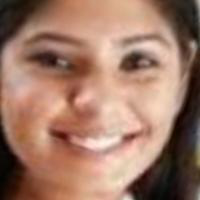

In [4]:
faces = list(path_face_cropped.glob('*.jpg'))
print(faces[1])
img1 = PIL.Image.open(str(faces[1]))
img1

In [5]:
batch = 32
img_height = 210
img_width = 210

# Data Preprocessing for age detection model

Age ranges:<br>
1. 0-20
2. 21-40
3. 41-60
4. 61-80
5. 81-116

In [6]:
age_class=['0-20','21-40','41-60','61-80','81-116']

## Creating a csv file for the images and their labels

In [7]:
df = pd.DataFrame(columns=['images','age','gender'])
for img in faces:
    new_img = str(img)
    img = new_img.split("/")
    #print(img)
    img_name = img[4]
    img = img_name.split("_")
    #print(img)
    #Making 0 and 1 into male and female to make it more interpretable
    if img[1] == '0':
        img[1] = 'male'
    else:
        img[1] = 'female'
    #Making the age label into age ranges instead
    img[0] = int(img[0])
#     if int(img[0]) > 100:
#         img[0] = '101-116'
    if img[0] >80:
        img[0] = '81-116'
    elif img[0] > 60:
        img[0] = '61-80'
    elif img[0] > 40:
        img[0] = '41-60'
    elif img[0] > 20:
        img[0] = '21-40'
    else:
        img[0] = '0-20'    
    df2 = {'images':new_img,'age':img[0],'gender':img[1]}
    df = df.append(df2,ignore_index=True)
df

images    age  gender
0     ../input/utkface-new/crop_part1/26_0_2_2017010...  21-40    male
1     ../input/utkface-new/crop_part1/21_1_3_2017010...  21-40  female
2     ../input/utkface-new/crop_part1/17_1_4_2017010...   0-20  female
3     ../input/utkface-new/crop_part1/76_0_0_2017010...  61-80    male
4     ../input/utkface-new/crop_part1/18_1_0_2017010...   0-20  female
...                                                 ...    ...     ...
9775  ../input/utkface-new/crop_part1/26_1_0_2017011...  21-40  female
9776  ../input/utkface-new/crop_part1/66_0_0_2017010...  61-80    male
9777  ../input/utkface-new/crop_part1/41_0_0_2017010...  41-60    male
9778  ../input/utkface-new/crop_part1/2_0_2_20161219...   0-20    male
9779  ../input/utkface-new/crop_part1/65_1_0_2017011...  61-80  female

[9780 rows x 3 columns]

In [8]:
df_data = df.images
y_data = df.age
y2_data = df.gender
X_train, X_test, y_train, y_test = train_test_split(df_data, y_data, test_size=0.2)

In [9]:
type(X_train)

pandas.core.series.Series

In [10]:
d = {'images':X_train,'age':y_train}
df_train = pd.concat(d,axis=1)
df_train.images

9777    ../input/utkface-new/crop_part1/41_0_0_2017010...
121     ../input/utkface-new/crop_part1/26_1_0_2017010...
5918    ../input/utkface-new/crop_part1/2_1_3_20161219...
3617    ../input/utkface-new/crop_part1/12_1_0_2017010...
5458    ../input/utkface-new/crop_part1/1_0_4_20161221...
                              ...                        
350     ../input/utkface-new/crop_part1/52_1_0_2017011...
79      ../input/utkface-new/crop_part1/4_1_3_20161220...
8039    ../input/utkface-new/crop_part1/1_1_2_20161219...
6936    ../input/utkface-new/crop_part1/3_1_3_20161220...
5640    ../input/utkface-new/crop_part1/2_0_2_20161219...
Name: images, Length: 7824, dtype: object

In [11]:
df_data = df_train.images
y_data = df_train.age
y2_data = df.gender
X_train, X_val, y_train, y_val = train_test_split(df_data, y_data, test_size=0.2)

In [12]:
d = {'images':X_train,'age':y_train}
train = pd.concat(d,axis=1)
train

images    age
6698  ../input/utkface-new/crop_part1/30_0_3_2017010...  21-40
2500  ../input/utkface-new/crop_part1/31_1_2_2017010...  21-40
8135  ../input/utkface-new/crop_part1/6_0_2_20161219...   0-20
7886  ../input/utkface-new/crop_part1/62_0_0_2017011...  61-80
2171  ../input/utkface-new/crop_part1/12_0_4_2017010...   0-20
...                                                 ...    ...
8499  ../input/utkface-new/crop_part1/1_1_4_20170103...   0-20
154   ../input/utkface-new/crop_part1/32_1_3_2017010...  21-40
4236  ../input/utkface-new/crop_part1/1_0_2_20161219...   0-20
9210  ../input/utkface-new/crop_part1/17_0_3_2017010...   0-20
2526  ../input/utkface-new/crop_part1/2_1_2_20161219...   0-20

[6259 rows x 2 columns]

In [13]:
train['age'].value_counts()

0-20      2704
21-40     1646
41-60     1073
61-80      620
81-116     216
Name: age, dtype: int64

In [14]:
d = {'images':X_val,'age':y_val}
val = pd.concat(d,axis=1)
val

images    age
3196  ../input/utkface-new/crop_part1/52_0_0_2017010...  41-60
783   ../input/utkface-new/crop_part1/13_0_0_2017010...   0-20
6129  ../input/utkface-new/crop_part1/57_0_0_2017010...  41-60
3574  ../input/utkface-new/crop_part1/65_1_0_2017011...  61-80
1082  ../input/utkface-new/crop_part1/18_1_0_2017010...   0-20
...                                                 ...    ...
6187  ../input/utkface-new/crop_part1/1_1_0_20161219...   0-20
9061  ../input/utkface-new/crop_part1/11_1_4_2017010...   0-20
4009  ../input/utkface-new/crop_part1/64_0_0_2017010...  61-80
3761  ../input/utkface-new/crop_part1/43_0_4_2017010...  41-60
8189  ../input/utkface-new/crop_part1/3_0_0_20170109...   0-20

[1565 rows x 2 columns]

In [15]:
d = {'images':X_test,'age':y_test}
df_test = pd.concat(d,axis=1)
df_test

images    age
991   ../input/utkface-new/crop_part1/1_0_0_20170110...   0-20
5797  ../input/utkface-new/crop_part1/3_1_4_20161221...   0-20
5077  ../input/utkface-new/crop_part1/46_0_4_2017010...  41-60
9136  ../input/utkface-new/crop_part1/58_1_3_2017010...  41-60
2215  ../input/utkface-new/crop_part1/1_0_2_20161219...   0-20
...                                                 ...    ...
4328  ../input/utkface-new/crop_part1/42_0_0_2017010...  41-60
6509  ../input/utkface-new/crop_part1/5_0_0_20170110...   0-20
8225  ../input/utkface-new/crop_part1/1_1_0_20170109...   0-20
2277  ../input/utkface-new/crop_part1/49_1_0_2017010...  41-60
8165  ../input/utkface-new/crop_part1/73_0_0_2017011...  61-80

[1956 rows x 2 columns]

In [16]:
train_gen = ImageDataGenerator(#rotation_range=45,
                               rescale=1./255#,
                               #horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'age', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

test_data = test_gen.flow_from_dataframe(dataframe = df_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'age',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='sparse',
                                         target_size = (img_height,img_width))

val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'age', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

Found 6259 validated image filenames belonging to 5 classes.
Found 1956 validated image filenames belonging to 5 classes.
Found 1565 validated image filenames belonging to 5 classes.


In [18]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
conv_layer_32 = layers.Conv2D(32,(3,3),activation='relu')
conv_layer_64 = layers.Conv2D(64,3,activation='relu')
conv_layer_16 = layers.Conv2D(16,3,activation='relu')
max_pool = layers.MaxPooling2D()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [19]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 210, 210, 3)
(32,)


In [20]:
for image_batch, labels_batch in val_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 210, 210, 3)
(32,)


# Age Detection Model

In [21]:
num_classes = 5

model = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  #
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  #  
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs= 10,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/10
196/196 [==============================] - 58s 296ms/step - loss: 1.3087 - accuracy: 0.4439 - val_loss: 1.0355 - val_accuracy: 0.5655
Epoch 2/10
196/196 [==============================] - 19s 98ms/step - loss: 1.0240 - accuracy: 0.5767 - val_loss: 0.9171 - val_accuracy: 0.6217
Epoch 3/10
196/196 [==============================] - 18s 94ms/step - loss: 0.9195 - accuracy: 0.6223 - val_loss: 0.9113 - val_accuracy: 0.6230
Epoch 4/10
196/196 [==============================] - 19s 95ms/step - loss: 0.8797 - accuracy: 0.6320 - val_loss: 0.9467 - val_accuracy: 0.6083
Epoch 5/10
196/196 [==============================] - 18s 94ms/step - loss: 0.8588 - accuracy: 0.6409 - val_loss: 0.8558 - val_accuracy: 0.6313
Epoch 6/10
196/196 [==============================] - 18s 93ms/step - loss: 0.8105 - accuracy: 0.6655 - val_loss: 0.8626 - val_accuracy: 0.6319
Epoch 7/10
196/196 [==============================] - 19s 94ms/step - loss: 0.7790 - accuracy: 0.6834 - val_loss: 0.8080 - val_accuracy

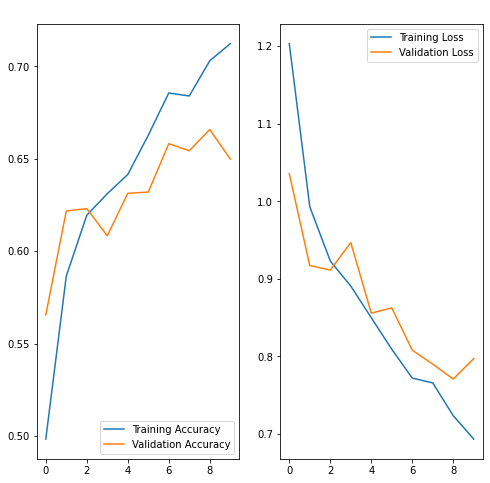

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               44302464  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 44,304,005
Trainable params: 44,304,005
Non-trainable params: 0
____________________________________________

In [26]:
results_age = model.evaluate(test_data)
print("test loss, test acc:", results_age)

62/62 [==============================] - 13s 213ms/step - loss: 0.8191 - accuracy: 0.6672
test loss, test acc: [0.8190575838088989, 0.6671779155731201]


# Data Preprocessing for gender detection model

In [27]:
df_data = df.images
y2_data = df.gender
X_train, X_test, y_train, y_test = train_test_split(df_data, y2_data, test_size=0.2)

In [28]:
d = {'images':X_train,'gender':y_train}
df_train2 = pd.concat(d,axis=1)
df_train2.images

8254    ../input/utkface-new/crop_part1/9_0_0_20170110...
4414    ../input/utkface-new/crop_part1/24_1_3_2017010...
5419    ../input/utkface-new/crop_part1/9_0_0_20170110...
7263    ../input/utkface-new/crop_part1/24_1_0_2017010...
9270    ../input/utkface-new/crop_part1/1_0_2_20161219...
                              ...                        
5381    ../input/utkface-new/crop_part1/32_1_0_2017010...
793     ../input/utkface-new/crop_part1/1_0_2_20161219...
3861    ../input/utkface-new/crop_part1/24_0_4_2017010...
8028    ../input/utkface-new/crop_part1/2_0_2_20161219...
525     ../input/utkface-new/crop_part1/78_0_0_2017011...
Name: images, Length: 7824, dtype: object

In [29]:
df_data = df_train2.images
y2_data = df_train2.gender
X_train, X_val, y_train, y_val = train_test_split(df_data, y2_data, test_size=0.2)

In [30]:
d = {'images':X_train,'gender':y_train}
train = pd.concat(d,axis=1)
train

images  gender
6807  ../input/utkface-new/crop_part1/12_0_4_2017010...    male
7566  ../input/utkface-new/crop_part1/65_1_0_2017011...  female
1288  ../input/utkface-new/crop_part1/3_0_0_20161219...    male
7570  ../input/utkface-new/crop_part1/11_0_0_2017011...    male
9387  ../input/utkface-new/crop_part1/21_1_2_2017010...  female
...                                                 ...     ...
4596  ../input/utkface-new/crop_part1/9_0_0_20170110...    male
2062  ../input/utkface-new/crop_part1/1_1_3_20161220...  female
6362  ../input/utkface-new/crop_part1/1_0_0_20161219...    male
3843  ../input/utkface-new/crop_part1/18_1_2_2017010...  female
8977  ../input/utkface-new/crop_part1/1_1_3_20161220...  female

[6259 rows x 2 columns]

In [31]:
d = {'images':X_val,'gender':y_val}
val = pd.concat(d,axis=1)
val

images  gender
1764  ../input/utkface-new/crop_part1/56_0_0_2017010...    male
1492  ../input/utkface-new/crop_part1/57_0_0_2017010...    male
6969  ../input/utkface-new/crop_part1/85_1_1_2017011...  female
2834  ../input/utkface-new/crop_part1/16_0_0_2017011...    male
210   ../input/utkface-new/crop_part1/1_1_0_20170109...  female
...                                                 ...     ...
1413  ../input/utkface-new/crop_part1/17_0_0_2017011...    male
3291  ../input/utkface-new/crop_part1/58_1_0_2017010...  female
5509  ../input/utkface-new/crop_part1/9_0_0_20170110...    male
505   ../input/utkface-new/crop_part1/8_0_4_20170103...    male
7295  ../input/utkface-new/crop_part1/2_1_2_20161219...  female

[1565 rows x 2 columns]

In [32]:
d = {'images':X_test,'gender':y_test}
df_test = pd.concat(d,axis=1)
df_test

images  gender
1275  ../input/utkface-new/crop_part1/8_0_0_20170110...    male
5489  ../input/utkface-new/crop_part1/26_0_4_2017010...    male
8943  ../input/utkface-new/crop_part1/24_1_3_2017010...  female
5926  ../input/utkface-new/crop_part1/23_1_1_2017010...  female
3204  ../input/utkface-new/crop_part1/5_0_0_20170110...    male
...                                                 ...     ...
5679  ../input/utkface-new/crop_part1/4_0_0_20170110...    male
4509  ../input/utkface-new/crop_part1/47_0_0_2017010...    male
1250  ../input/utkface-new/crop_part1/2_0_0_20170110...    male
236   ../input/utkface-new/crop_part1/31_1_4_2017010...  female
4155  ../input/utkface-new/crop_part1/2_0_3_20161219...    male

[1956 rows x 2 columns]

In [33]:
train_data = train_gen.flow_from_dataframe(dataframe = train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

test_data = test_gen.flow_from_dataframe(dataframe = df_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'gender',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='categorical',
                                         target_size = (img_height,img_width))

val_data = train_gen.flow_from_dataframe(dataframe = val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'gender', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="categorical",
                                           target_size = (img_height,img_width))

Found 6259 validated image filenames belonging to 2 classes.
Found 1956 validated image filenames belonging to 2 classes.
Found 1565 validated image filenames belonging to 2 classes.


# Gender Detection Model

In [34]:
num_classes = 2

model2 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  #
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
  conv_layer_64,
  max_pool,
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  #layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [35]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [36]:
history = model2.fit(
    train_data,
    validation_data=val_data,
    epochs= 10,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/10
196/196 [==============================] - 19s 95ms/step - loss: 0.6617 - accuracy: 0.5890 - val_loss: 0.5898 - val_accuracy: 0.6882
Epoch 2/10
196/196 [==============================] - 19s 98ms/step - loss: 0.5850 - accuracy: 0.6768 - val_loss: 0.5377 - val_accuracy: 0.7374
Epoch 3/10
196/196 [==============================] - 19s 95ms/step - loss: 0.5068 - accuracy: 0.7425 - val_loss: 0.4949 - val_accuracy: 0.7559
Epoch 4/10
196/196 [==============================] - 20s 101ms/step - loss: 0.4931 - accuracy: 0.7468 - val_loss: 0.4862 - val_accuracy: 0.7629
Epoch 5/10
196/196 [==============================] - 19s 98ms/step - loss: 0.4593 - accuracy: 0.7707 - val_loss: 0.5365 - val_accuracy: 0.7323
Epoch 6/10
196/196 [==============================] - 19s 98ms/step - loss: 0.4485 - accuracy: 0.7863 - val_loss: 0.4874 - val_accuracy: 0.7623
Epoch 7/10
196/196 [==============================] - 20s 102ms/step - loss: 0.4318 - accuracy: 0.7927 - val_loss: 0.4688 - val_accurac

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               88604800  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 88,606,850
Trainable params: 88,606,850
Non-trainable params: 0
__________________________________________

In [38]:
results_gender = model2.evaluate(test_data)
print("test loss, test acc:", results_gender)

62/62 [==============================] - 4s 70ms/step - loss: 0.4331 - accuracy: 0.7817
test loss, test acc: [0.4331091642379761, 0.7816973328590393]


# Using the CKPlus dataset for emotion detection

In [39]:
path_ck= '../input/ckplus/CK+48/'

path_ck = pathlib.Path(path_ck)
print(path_ck)
print(len(str(path_ck)))

#Images in this dataset are saved as .png
image_count = len(list(path_ck.glob('*/*.png')))
print(image_count)

../input/ckplus/CK+48
21
981


In [40]:
emotion_class = os.listdir(path_ck)
emotion_class

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']

## Checking the count of images in each class

In [41]:
surprise = len(list(path_ck.glob('surprise/*.png')))
print(surprise)
fear = len(list(path_ck.glob('fear/*.png')))
print(fear)
sadness = len(list(path_ck.glob('sadness/*.png')))
print(sadness)
disgust = len(list(path_ck.glob('disgust/*.png')))
print(disgust)
contempt = len(list(path_ck.glob('contempt/*.png')))
print(contempt)
happy = len(list(path_ck.glob('happy/*.png')))
print(happy)
anger = len(list(path_ck.glob('anger/*.png')))
print(anger)

249
75
84
177
54
207
135


In [42]:
emotion_df = pd.DataFrame(columns=['images','emotion'])
for label in emotion_class:
    for image in list(path_ck.glob(label+'/*.png')):
        df2 = {'images':str(image),'emotion':label}
        emotion_df = emotion_df.append(df2,ignore_index=True)
emotion_df

images   emotion
0    ../input/ckplus/CK+48/surprise/S071_001_000000...  surprise
1    ../input/ckplus/CK+48/surprise/S082_001_000000...  surprise
2    ../input/ckplus/CK+48/surprise/S116_001_000000...  surprise
3    ../input/ckplus/CK+48/surprise/S097_001_000000...  surprise
4    ../input/ckplus/CK+48/surprise/S085_003_000000...  surprise
..                                                 ...       ...
976  ../input/ckplus/CK+48/anger/S119_008_00000016.png     anger
977  ../input/ckplus/CK+48/anger/S113_008_00000021.png     anger
978  ../input/ckplus/CK+48/anger/S136_005_00000008.png     anger
979  ../input/ckplus/CK+48/anger/S089_003_00000036.png     anger
980  ../input/ckplus/CK+48/anger/S119_008_00000018.png     anger

[981 rows x 2 columns]

### Shuffling the dataframe

In [43]:
emotion_df = emotion_df.sample(frac=1)
emotion_df

images   emotion
959  ../input/ckplus/CK+48/anger/S037_003_00000022.png     anger
190  ../input/ckplus/CK+48/surprise/S035_001_000000...  surprise
116  ../input/ckplus/CK+48/surprise/S097_001_000000...  surprise
254   ../input/ckplus/CK+48/fear/S055_006_00000006.png      fear
350  ../input/ckplus/CK+48/sadness/S113_003_0000001...   sadness
..                                                 ...       ...
898  ../input/ckplus/CK+48/anger/S082_005_00000016.png     anger
168  ../input/ckplus/CK+48/surprise/S125_007_000000...  surprise
120  ../input/ckplus/CK+48/surprise/S131_001_000000...  surprise
935  ../input/ckplus/CK+48/anger/S090_007_00000013.png     anger
656  ../input/ckplus/CK+48/happy/S037_006_00000021.png     happy

[981 rows x 2 columns]

In [44]:
emotion_data = emotion_df.images
y_data = emotion_df.emotion
X_train, X_test, y_train, y_test = train_test_split(emotion_data, y_data, test_size=0.2)

In [45]:
d3 = {'images':X_train,'emotion':y_train}
emotion_train = pd.concat(d3,axis=1)
emotion_train

images   emotion
248  ../input/ckplus/CK+48/surprise/S054_003_000000...  surprise
389  ../input/ckplus/CK+48/sadness/S501_006_0000003...   sadness
152  ../input/ckplus/CK+48/surprise/S079_001_000000...  surprise
561  ../input/ckplus/CK+48/disgust/S132_005_0000001...   disgust
207  ../input/ckplus/CK+48/surprise/S076_001_000000...  surprise
..                                                 ...       ...
145  ../input/ckplus/CK+48/surprise/S114_001_000000...  surprise
244  ../input/ckplus/CK+48/surprise/S075_002_000000...  surprise
246  ../input/ckplus/CK+48/surprise/S088_001_000000...  surprise
266   ../input/ckplus/CK+48/fear/S504_004_00000013.png      fear
134  ../input/ckplus/CK+48/surprise/S111_001_000000...  surprise

[784 rows x 2 columns]

In [46]:
d3 = {'images':X_test,'emotion':y_test}
emotion_test = pd.concat(d3,axis=1)
emotion_test

images   emotion
415  ../input/ckplus/CK+48/disgust/S078_007_0000001...   disgust
317   ../input/ckplus/CK+48/fear/S055_006_00000008.png      fear
371  ../input/ckplus/CK+48/sadness/S042_002_0000001...   sadness
662  ../input/ckplus/CK+48/happy/S065_004_00000028.png     happy
837  ../input/ckplus/CK+48/happy/S106_006_00000010.png     happy
..                                                 ...       ...
913  ../input/ckplus/CK+48/anger/S112_005_00000017.png     anger
233  ../input/ckplus/CK+48/surprise/S110_001_000000...  surprise
124  ../input/ckplus/CK+48/surprise/S059_001_000000...  surprise
950  ../input/ckplus/CK+48/anger/S066_005_00000010.png     anger
138  ../input/ckplus/CK+48/surprise/S022_001_000000...  surprise

[197 rows x 2 columns]

In [47]:
emotion_test['emotion'].value_counts()

surprise    45
happy       44
disgust     40
anger       30
sadness     16
fear        15
contempt     7
Name: emotion, dtype: int64

In [48]:
occurences_test = list(emotion_test['emotion'].value_counts())
tot = sum(occurences_test)
occurences_test = [el/ tot for el in occurences_test]
occurences_test

[0.22842639593908629,
 0.2233502538071066,
 0.20304568527918782,
 0.15228426395939088,
 0.08121827411167512,
 0.07614213197969544,
 0.03553299492385787]

### Splitting the emotion_train again for validation set

In [49]:
emotion_data = emotion_train.images
y_data = emotion_train.emotion
X_train, X_val, y_train, y_val = train_test_split(emotion_data, y_data, test_size=0.2)

In [50]:
d3 = {'images':X_val,'emotion':y_val}
emotion_val = pd.concat(d3,axis=1)
emotion_val

images   emotion
247  ../input/ckplus/CK+48/surprise/S067_002_000000...  surprise
434  ../input/ckplus/CK+48/disgust/S032_005_0000001...   disgust
196  ../input/ckplus/CK+48/surprise/S133_009_000000...  surprise
189  ../input/ckplus/CK+48/surprise/S074_002_000000...  surprise
820  ../input/ckplus/CK+48/happy/S115_008_00000017.png     happy
..                                                 ...       ...
246  ../input/ckplus/CK+48/surprise/S088_001_000000...  surprise
554  ../input/ckplus/CK+48/disgust/S035_005_0000001...   disgust
367  ../input/ckplus/CK+48/sadness/S132_002_0000001...   sadness
19   ../input/ckplus/CK+48/surprise/S067_002_000000...  surprise
803  ../input/ckplus/CK+48/happy/S055_005_00000045.png     happy

[157 rows x 2 columns]

In [51]:
emotion_val['emotion'].value_counts()

surprise    40
happy       37
anger       22
disgust     19
sadness     17
fear        14
contempt     8
Name: emotion, dtype: int64

In [52]:
occurences_val = list(emotion_val['emotion'].value_counts())
tot = sum(occurences_val)
occurences_val = [el/ tot for el in occurences_val]
occurences_val

[0.25477707006369427,
 0.2356687898089172,
 0.14012738853503184,
 0.12101910828025478,
 0.10828025477707007,
 0.08917197452229299,
 0.050955414012738856]

In [53]:
d3 = {'images':X_train,'emotion':y_train}
emotion_train = pd.concat(d3,axis=1)
emotion_train

images   emotion
377  ../input/ckplus/CK+48/sadness/S136_003_0000001...   sadness
428  ../input/ckplus/CK+48/disgust/S060_005_0000002...   disgust
238  ../input/ckplus/CK+48/surprise/S133_009_000000...  surprise
706  ../input/ckplus/CK+48/happy/S132_006_00000023.png     happy
919  ../input/ckplus/CK+48/anger/S032_003_00000015.png     anger
..                                                 ...       ...
937  ../input/ckplus/CK+48/anger/S133_003_00000045.png     anger
679  ../input/ckplus/CK+48/happy/S106_006_00000009.png     happy
411  ../input/ckplus/CK+48/disgust/S058_006_0000001...   disgust
6    ../input/ckplus/CK+48/surprise/S085_003_000000...  surprise
152  ../input/ckplus/CK+48/surprise/S079_001_000000...  surprise

[627 rows x 2 columns]

In [54]:
emotion_train['emotion'].value_counts()

surprise    164
happy       126
disgust     118
anger        83
sadness      51
fear         46
contempt     39
Name: emotion, dtype: int64

In [55]:
occurences_train = list(emotion_train['emotion'].value_counts())
tot = sum(occurences_train)
occurences_train = [el/ tot for el in occurences_train]
occurences_train

[0.26156299840510366,
 0.20095693779904306,
 0.18819776714513556,
 0.13237639553429026,
 0.08133971291866028,
 0.0733652312599681,
 0.06220095693779904]

In [56]:
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

In [57]:
train = train_gen.flow_from_dataframe(dataframe = emotion_train, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'emotion', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

test = test_gen.flow_from_dataframe(dataframe = emotion_test,
                                         #directory = test_folder,
                                         x_col = 'images',
                                         y_col = 'emotion',
                                         batch_size = batch,
                                         shuffle = True,
                                         class_mode='sparse',
                                         target_size = (img_height,img_width))

val = train_gen.flow_from_dataframe(dataframe = emotion_val, 
                                           #directory = train_folder, 
                                           x_col = 'images',
                                           y_col = 'emotion', seed = 42,
                                           batch_size = batch,
                                           shuffle = True, 
                                           class_mode="sparse",
                                           target_size = (img_height,img_width))

Found 627 validated image filenames belonging to 7 classes.
Found 197 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.


# Emotion Detection Model

In [58]:
num_classes = 7

model3 = tf.keras.Sequential([
  normalization_layer,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  conv_layer_32,
  max_pool,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [59]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [60]:
history = model3.fit(
    train,
    validation_data=val,
    epochs= 10,
    callbacks = callback,
    shuffle=False
)
eff_epochs = len(history.history['loss'])

Epoch 1/10
20/20 [==============================] - 5s 253ms/step - loss: 1.7279 - accuracy: 0.3435 - val_loss: 1.3373 - val_accuracy: 0.5478
Epoch 2/10
20/20 [==============================] - 1s 62ms/step - loss: 1.0923 - accuracy: 0.6247 - val_loss: 0.9080 - val_accuracy: 0.6433
Epoch 3/10
20/20 [==============================] - 1s 63ms/step - loss: 0.7314 - accuracy: 0.7396 - val_loss: 0.7565 - val_accuracy: 0.7452
Epoch 4/10
20/20 [==============================] - 1s 68ms/step - loss: 0.5558 - accuracy: 0.8475 - val_loss: 0.5757 - val_accuracy: 0.8089
Epoch 5/10
20/20 [==============================] - 1s 65ms/step - loss: 0.4415 - accuracy: 0.8693 - val_loss: 0.5742 - val_accuracy: 0.7771
Epoch 6/10
20/20 [==============================] - 1s 64ms/step - loss: 0.3689 - accuracy: 0.8987 - val_loss: 0.3887 - val_accuracy: 0.8917
Epoch 7/10
20/20 [==============================] - 1s 61ms/step - loss: 0.2663 - accuracy: 0.9388 - val_loss: 0.3499 - val_accuracy: 0.8535
Epoch 8/10
2

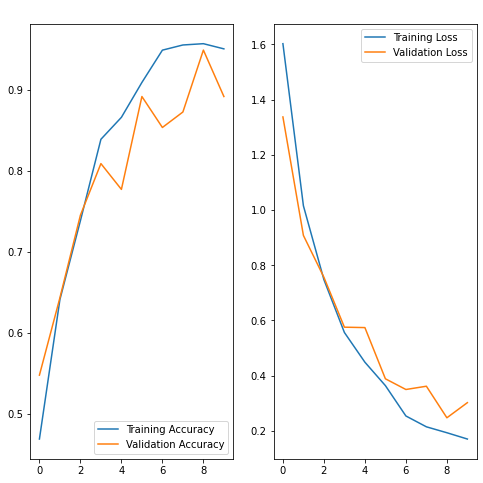

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(eff_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.show()

In [62]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               44302464  
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 903       
Total params: 44,304,263
Trainable params: 44,304,263
Non-trainable params: 0
__________________________________________

In [63]:
results_emotion = model3.evaluate(test)
print("test loss, test acc:", results_emotion)

7/7 [==============================] - 1s 168ms/step - loss: 0.3607 - accuracy: 0.8731
test loss, test acc: [0.3606500029563904, 0.8730964660644531]


# Predicting on new data

In [64]:
picture_url = "https://icdn5.digitaltrends.com/image/screen-shot-2019-02-15-at-19-16-58-720x720.jpg"
pic_path = tf.keras.utils.get_file('screen-shot-2019-02-15-at-19-16-58-720x720', origin=picture_url)

40960/37128 [=================================] - 0s 0us/step


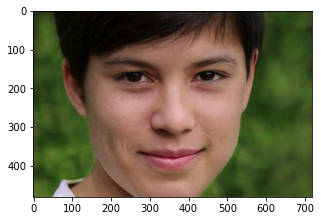

In [65]:
plt.figure(figsize=(5,5))
img = PIL.Image.open(pic_path)
plt.imshow(img)

In [66]:
img = tf.keras.preprocessing.image.load_img(
    pic_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [67]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(age_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0-20 with a 100.00 percent confidence.


In [68]:
gender_class = ['male','female']
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(gender_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to male with a 100.00 percent confidence.


In [69]:
predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(emotion_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to happy with a 100.00 percent confidence.


### Second Example

In [70]:
picture_url = "https://qodebrisbane.com/wp-content/uploads/2019/07/This-is-not-a-person-2-1.jpeg"
pic_path = tf.keras.utils.get_file('This-is-not-a-person-2-1', origin=picture_url)

581632/580409 [==============================] - 1s 1us/step


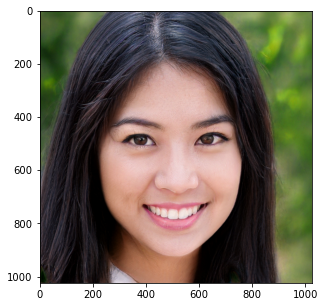

In [71]:
plt.figure(figsize=(5,5))
img = PIL.Image.open(pic_path)
plt.imshow(img)

In [72]:
img = tf.keras.preprocessing.image.load_img(
    pic_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [73]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(age_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0-20 with a 100.00 percent confidence.


In [74]:
gender_class = ['male','female']
predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(gender_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to male with a 100.00 percent confidence.


In [75]:
predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(emotion_class[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to anger with a 100.00 percent confidence.
